In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
print(df)

                ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.11206

In [3]:
df['Side'] = df['Side'].map({'R':1, 'L':0})
df['Side']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2845337    1.0
2845338    1.0
2845339    1.0
2845340    1.0
2845341    1.0
Name: Side, Length: 2845342, dtype: float64

In [4]:
df.dropna(inplace=True)

In [5]:
check_nan = df.isnull().values.sum()
print(check_nan)

0


In [6]:
df.drop(columns=['ID', 'Description', 'Street',
        'City', 'County', 'State', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],inplace=True)
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,Zipcode
42,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.45112,-85.15048,40.35429,-85.14993,6.690,9001.0,1.0,47336
43,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.35429,-85.14993,40.45112,-85.15048,6.690,473.0,1.0,47373-9430
47,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.72813,-84.78965,40.74559,-84.78962,1.206,12998.0,1.0,45898-9523
50,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.83193,-80.10143,41.84149,-80.11099,0.824,25529.0,0.0,16403
66,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.48339,-81.66297,41.47692,-81.66075,0.462,3937.0,0.0,44115


In [7]:
df[['Start_Time','StTime']] = df['Start_Time'].str.split(expand=True)
df[['End_Time','EnTime']] = df['End_Time'].str.split(expand=True)
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,Zipcode,StTime,EnTime
42,4,2016-02-09,2016-02-10,40.451120,-85.150480,40.354290,-85.149930,6.690,9001.0,1.0,47336,18:20:58,00:20:58
43,4,2016-02-09,2016-02-10,40.354290,-85.149930,40.451120,-85.150480,6.690,473.0,1.0,47373-9430,18:20:58,00:20:58
47,4,2016-02-10,2016-02-10,40.728130,-84.789650,40.745590,-84.789620,1.206,12998.0,1.0,45898-9523,06:18:49,12:18:49
50,2,2016-02-10,2016-02-10,41.831930,-80.101430,41.841490,-80.110990,0.824,25529.0,0.0,16403,08:35:27,14:35:27
66,2,2016-02-10,2016-02-10,41.483390,-81.662970,41.476920,-81.660750,0.462,3937.0,0.0,44115,12:54:39,18:54:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845298,3,2019-08-23,2019-08-23,37.609816,-122.493720,37.608821,-122.495261,0.109,895.0,1.0,94044,16:19:21,16:48:04
2845302,4,2019-08-23,2019-08-23,38.995930,-121.672020,39.003170,-121.662679,0.708,3044.0,1.0,95993-9744,17:25:12,17:54:00
2845303,4,2019-08-23,2019-08-23,39.003170,-121.662679,38.995930,-121.672020,0.708,2500.0,1.0,95993-9513,17:25:12,17:54:00
2845304,3,2019-08-23,2019-08-23,34.121320,-117.254540,34.121320,-117.254540,0.000,1498.0,0.0,92410-4114,01:16:01,01:44:53


In [8]:
df['Start_Time']=df['Start_Time'].str.replace('-','')
df['End_Time']=df['End_Time'].str.replace('-','')
df['StTime']=df['StTime'].str.replace(':','')
df['EnTime']=df['EnTime'].str.replace(':','')
df['Zipcode'] = df['Zipcode'].str.replace('-','')
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,Zipcode,StTime,EnTime
42,4,20160209,20160210,40.451120,-85.150480,40.354290,-85.149930,6.690,9001.0,1.0,47336,182058,002058
43,4,20160209,20160210,40.354290,-85.149930,40.451120,-85.150480,6.690,473.0,1.0,473739430,182058,002058
47,4,20160210,20160210,40.728130,-84.789650,40.745590,-84.789620,1.206,12998.0,1.0,458989523,061849,121849
50,2,20160210,20160210,41.831930,-80.101430,41.841490,-80.110990,0.824,25529.0,0.0,16403,083527,143527
66,2,20160210,20160210,41.483390,-81.662970,41.476920,-81.660750,0.462,3937.0,0.0,44115,125439,185439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845298,3,20190823,20190823,37.609816,-122.493720,37.608821,-122.495261,0.109,895.0,1.0,94044,161921,164804
2845302,4,20190823,20190823,38.995930,-121.672020,39.003170,-121.662679,0.708,3044.0,1.0,959939744,172512,175400
2845303,4,20190823,20190823,39.003170,-121.662679,38.995930,-121.672020,0.708,2500.0,1.0,959939513,172512,175400
2845304,3,20190823,20190823,34.121320,-117.254540,34.121320,-117.254540,0.000,1498.0,0.0,924104114,011601,014453


In [9]:
X = df.iloc[:, 1:13].values
y = df.iloc[:,0].values
# Y = Y.reshape(-1,1)
print(X.shape)
print(y.shape)

(943318, 12)
(943318,)


# Decision Tree

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

In [11]:
print(cm)

[[  1231   1268     23     28]
 [   136 221150    185   1034]
 [    60   1952    948    482]
 [    20   4328    168   2817]]


In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def get_confusion_matrix(cnf_matrix):
  class_names=[0,1] # name of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')



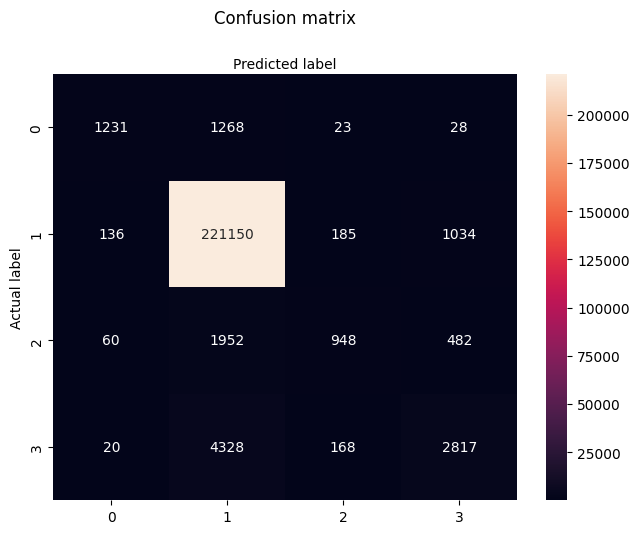

In [13]:
cnf_matrix = confusion_matrix(y_test, dtree_predictions)
get_confusion_matrix(cnf_matrix)

In [14]:
dtree_score = dtree_model.score(X_test,y_test)
print('Accuracy: ', dtree_score)

Accuracy:  0.9589365220709833


In [15]:
from sklearn.metrics import precision_score,recall_score
micro_precision = precision_score(dtree_predictions, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

# macro_precision = precision_score(dtree_predictions, y_test, average='macro')
# print('Macro-averaged precision score: {0:0.2f}'.format(
#       macro_precision))

# per_class_precision = precision_score(dtree_predictions, y_test, average=None)
# print('Per-class precision score:', per_class_precision)


micro_recall = recall_score(dtree_predictions, y_test, average='micro')
print('Micro-averaged recall score: {0:0.2f}'.format(
      micro_recall))

# macro_recall = recall_score(dtree_predictions, y_test, average='macro')
# print('Macro-averaged recall score: {0:0.2f}'.format(
#       micro_recall))

# per_class_recall = recall_score(dtree_predictions, y_test, average=None)
# print('Per-class recall score:', micro_recall)

Micro-averaged precision score: 0.96
Micro-averaged recall score: 0.96


# Gaussian NB 

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

# creating a confusion matrix
cmNB = confusion_matrix(y_test, gnb_predictions)

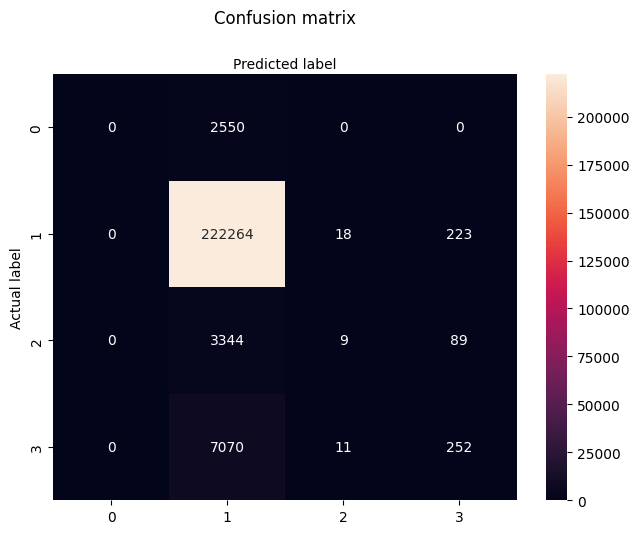

In [17]:
get_confusion_matrix(cmNB)

In [18]:
accuracy_NB = gnb.score(X_test, y_test)
print(accuracy_NB)

0.9435822414451087


In [19]:
from sklearn.metrics import precision_score,recall_score
micro_precision_NB = precision_score(gnb_predictions, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision_NB))

# macro_precision = precision_score(gnb_predictions, y_test, average='macro')
# print('Macro-averaged precision score: {0:0.2f}'.format(
#       macro_precision))

# per_class_precision = precision_score(gnb_predictions, y_test, average=None)
# print('Per-class precision score:', per_class_precision)


micro_recall_NB = recall_score(gnb_predictions, y_test, average='micro')
print('Micro-averaged recall score: {0:0.2f}'.format(
      micro_recall_NB))

# macro_recall = recall_score(gnb_predictions, y_test, average='macro')
# print('Macro-averaged recall score: {0:0.2f}'.format(
#       micro_recall))

# per_class_recall = recall_score(gnb_predictions, y_test, average=None)
# print('Per-class recall score:', micro_recall)

Micro-averaged precision score: 0.94
Micro-averaged recall score: 0.94


# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cmKNN = confusion_matrix(y_test, knn_predictions)

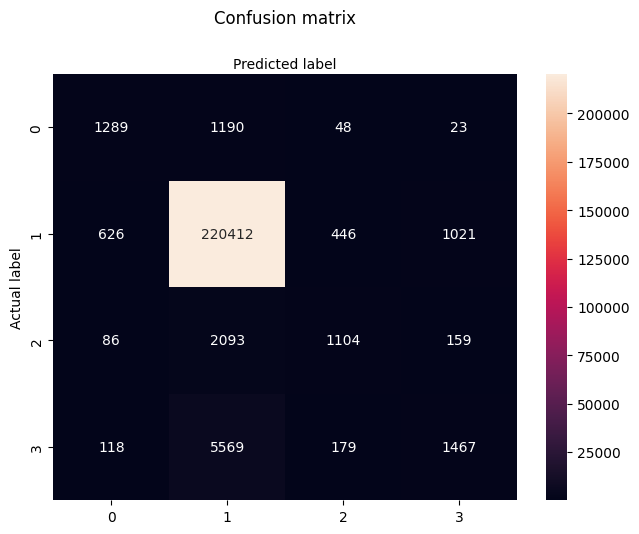

In [21]:
get_confusion_matrix(cmKNN)

In [22]:
accuracy_KNN = knn.score(X_test, y_test)
print(accuracy_KNN)

0.9509901200016961


In [23]:
from sklearn.metrics import precision_score,recall_score
micro_precision_KNN = precision_score(knn_predictions, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision_KNN))

# macro_precision = precision_score(gnb_predictions, y_test, average='macro')
# print('Macro-averaged precision score: {0:0.2f}'.format(
#       macro_precision))

# per_class_precision = precision_score(gnb_predictions, y_test, average=None)
# print('Per-class precision score:', per_class_precision)


micro_recall_KNN = recall_score(knn_predictions, y_test, average='micro')
print('Micro-averaged recall score: {0:0.2f}'.format(
      micro_recall_KNN))

# macro_recall = recall_score(gnb_predictions, y_test, average='macro')
# print('Macro-averaged recall score: {0:0.2f}'.format(
#       micro_recall))

# per_class_recall = recall_score(gnb_predictions, y_test, average=None)
# print('Per-class recall score:', micro_recall)

Micro-averaged precision score: 0.95
Micro-averaged recall score: 0.95


# Analysis

In [24]:
label = ['Decision Tree','Gaussian NB', 'KNN']
accuracy = [dtree_score,accuracy_NB,accuracy_KNN]
precision = [micro_precision,micro_precision_NB,micro_precision_KNN]
recall = [micro_recall,micro_recall_NB,micro_recall_KNN]

# Accuracy

<BarContainer object of 3 artists>

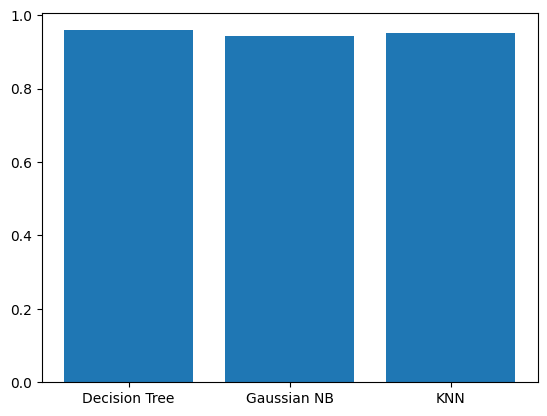

In [26]:
plt.bar(label,accuracy)

# Precision

<BarContainer object of 3 artists>

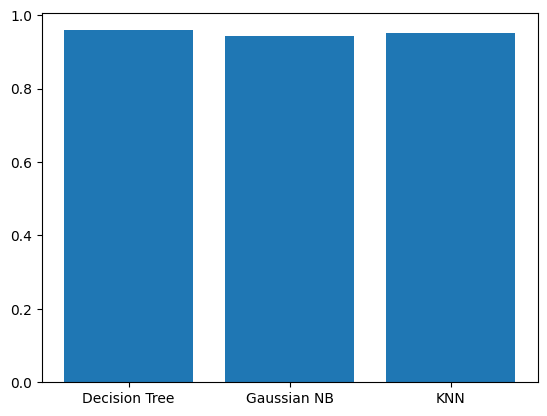

In [27]:
plt.bar(label,precision)

# Recall

<BarContainer object of 3 artists>

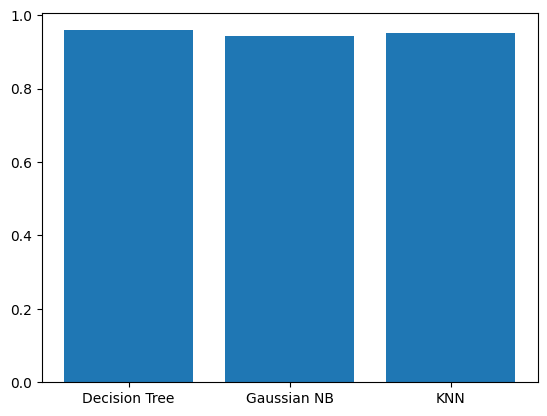

In [28]:
plt.bar(label,recall)